# OLS regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statistics as stats

df = pd.read_csv('student-por.csv', sep = ";")
#Drop extra columns
df = df.drop(["reason", "Mjob", "Fjob", "guardian"], axis = 1)

# Minimize Squared Error
## 1. Predict G3 (excluding G1, and G2)

# Split the data into training and testing data

$$\argmin_{\beta}(y - (\beta_{0} + X \beta))$$

In [2]:
le = preprocessing.LabelEncoder()

#Check the order in which the variables are being used
df = df.apply(lambda x: le.fit_transform(x) if x.dtypes == 'object' else x)

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [3]:
def get_sq_errors(betas, df):
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= betas
    return sum((df["G3"] - (beta0 + df["school"]*beta1  + df["sex"]*beta2 + df["age"]*beta3 + df["address"]*beta4 + df["famsize"]*beta5 + df["Pstatus"]*beta6 + df["Medu"]*beta7 + df["Fedu"]*beta8 + df["traveltime"]*beta9 + df["studytime"]*beta10 +df["failures"]*beta11 + df["schoolsup"]*beta12 + df["famsup"]*beta13 + df["paid"]*beta14 + df["activities"]*beta15 + df["nursery"]*beta16 + df["higher"]*beta17 + df['internet']*beta18 +df["romantic"]*beta19 + df['famrel']*beta20 + df['freetime']*beta21 + df["goout"]*beta22 + df["Dalc"]*beta23 + df["Walc"]*beta24 + df["health"]*beta25 +df["absences"]*beta26))**2)
         
initial_guess = np.ones(27)

results = minimize(get_sq_errors, args = train, method = "BFGS", x0 = initial_guess)

fitted_params = results.x
fitted_params

array([ 9.07106754e+00, -1.56732599e+00, -4.02486407e-01,  1.50361823e-01,
        2.20555731e-01,  2.50891045e-01, -2.39608128e-01,  8.37087595e-02,
        2.28247349e-01, -4.74827173e-03,  3.79265261e-01, -1.43499810e+00,
       -1.57315388e+00,  8.70966787e-02, -5.35682846e-01,  2.29523963e-01,
       -1.36418242e-01,  1.67312560e+00,  3.79898464e-01, -3.62603141e-01,
        1.14281651e-01, -6.85033927e-02, -1.33179162e-01, -3.20039716e-01,
       -4.39304993e-02, -2.09705581e-01, -4.79611302e-02])

## 3)  Do it again including G1 and G2, and compare the variance.

In [4]:
def get_sq_errors2(betas, df):
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26, beta27, beta28 = betas
    return sum((df["G3"] - (beta0 + df["school"]*beta1  + df["sex"]*beta2 + df["age"]*beta3 + df["address"]*beta4 + df["famsize"]*beta5+ df["Pstatus"]*beta6 + df["Medu"]*beta7 + df["Fedu"]*beta8 + df["traveltime"]*beta9 + df["studytime"]*beta10 +df["failures"]*beta11 + df["schoolsup"]*beta12 + df["famsup"]*beta13 + df["paid"]*beta14 + df["activities"]*beta15 + df["nursery"]*beta16 + df["higher"]*beta17 + df['internet']*beta18 +df["romantic"]*beta19 + df['famrel']*beta20 + df['freetime']*beta21 + df["goout"]*beta22 + df["Dalc"]*beta23 + df["Walc"]*beta24 + df["health"]*beta25 + df["absences"]*beta26 +df["G1"]*beta27 + df["G2"]*beta28))**2)
         
initial_guess = np.ones(29)

res = minimize(get_sq_errors2, args = train, method = "BFGS", x0 = initial_guess)

fitted_params_g1g2 = res.x
fitted_params_g1g2

array([ 0.15169903, -0.3570527 , -0.06278841,  0.01775454,  0.11415921,
        0.12643004, -0.04571816, -0.09256029,  0.02234237,  0.12286745,
        0.06035641, -0.1466147 , -0.15946279,  0.19014396, -0.23441569,
       -0.01483322, -0.0565218 ,  0.01125813,  0.11800503,  0.0631665 ,
       -0.07022044, -0.07969269,  0.02113446, -0.09043611,  0.01347602,
       -0.03536802,  0.01285282,  0.16575462,  0.86875327])

## Variance Squared Errors

In [5]:
beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= fitted_params

test['y_hat'] = beta0 + test["school"]*beta1  + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26

test["diff"] = test['G3'] - test['y_hat']

stats.variance((test["diff"])**2)

281.52665353594836

In [6]:
beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26, beta27, beta28 = fitted_params_g1g2
test['y_hat_g1g2'] = beta0 + test["school"]*beta1 + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26 + test["G1"]*beta27 + test["G2"]*beta28

test["diff_g1g2"] = test['G3'] - test['y_hat_g1g2']

stats.variance(test["diff_g1g2"]**2)

67.06103070627269

The variance of the squared differences seems to be much higher when I don't include G1 and G3.

# 5. Minimize absolute error

In [7]:
def get_sq_errors_abs(betas, df):
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= betas
    return sum(abs(df["G3"] - (beta0 + df["school"]*beta1  + df["sex"]*beta2 + df["age"]*beta3 + df["address"]*beta4 + df["famsize"]*beta5 + df["Pstatus"]*beta6 + df["Medu"]*beta7 + df["Fedu"]*beta8 + df["traveltime"]*beta9 + df["studytime"]*beta10 +df["failures"]*beta11 + df["schoolsup"]*beta12 + df["famsup"]*beta13 + df["paid"]*beta14 + df["activities"]*beta15 + df["nursery"]*beta16 + df["higher"]*beta17 + df['internet']*beta18 +df["romantic"]*beta19 + df['famrel']*beta20 + df['freetime']*beta21 + df["goout"]*beta22 + df["Dalc"]*beta23 + df["Walc"]*beta24 + df["health"]*beta25 +df["absences"]*beta26)))
         
initial_guess = np.ones(27)

res = minimize(get_sq_errors_abs, args = train, method = "BFGS", x0 = initial_guess)

fitted_params_abs = res.x
fitted_params_abs

array([ 5.02614931e+00, -9.11841869e-01, -3.05509462e-01,  3.83092970e-01,
       -3.44537015e-03, -1.73730770e-01, -1.42234061e-01,  2.58296080e-01,
        1.05034315e-01, -2.15598901e-01,  4.39984826e-01, -1.62427076e+00,
       -1.32315113e+00,  6.29522642e-03, -8.26001765e-01,  3.83617601e-01,
        1.55485977e-01,  1.54981380e+00,  3.43872298e-01, -4.40255851e-01,
        1.62963053e-01, -1.34537187e-01, -1.62300945e-01, -3.57108229e-01,
        1.23351661e-01, -1.89313242e-01, -7.79033841e-02])

In [8]:
def get_sq_errors_abs2(betas, df):
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26, beta27, beta28 = betas
    return sum(abs(df["G3"] - (beta0 + df["school"]*beta1  + df["sex"]*beta2 + df["age"]*beta3 + df["address"]*beta4 + df["famsize"]*beta5+ df["Pstatus"]*beta6 + df["Medu"]*beta7 + df["Fedu"]*beta8 + df["traveltime"]*beta9 + df["studytime"]*beta10 +df["failures"]*beta11 + df["schoolsup"]*beta12 + df["famsup"]*beta13 + df["paid"]*beta14 + df["activities"]*beta15 + df["nursery"]*beta16 + df["higher"]*beta17 + df['internet']*beta18 +df["romantic"]*beta19 + df['famrel']*beta20 + df['freetime']*beta21 + df["goout"]*beta22 + df["Dalc"]*beta23 + df["Walc"]*beta24 + df["health"]*beta25 + df["absences"]*beta26 +df["G1"]*beta27 + df["G2"]*beta28)))
    
initial_guess = np.ones(29)

res = minimize(get_sq_errors_abs2, args = train, method = "BFGS", x0 = initial_guess)

fitted_params_abs2 = res.x
fitted_params_abs2

array([-0.90875257, -0.08728718,  0.13313128,  0.10137817,  0.02632461,
        0.01022248,  0.01092471, -0.01879645,  0.07591775,  0.09865866,
        0.06946222, -0.13906392, -0.1636067 , -0.04562869, -0.15676126,
       -0.06422707, -0.06613501,  0.22523113,  0.07824654,  0.06436421,
       -0.05777647, -0.01648876, -0.01982468, -0.11987556, -0.00618645,
       -0.02789559,  0.00782146,  0.14184482,  0.82239787])

## Variance absolute error

In [9]:
beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= fitted_params_abs

test['y_hat_abs'] = beta0 + test["school"]*beta1  + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26

test["diff"] = test['G3'] - test['y_hat_abs']

stats.variance((test["diff"])**2)

341.64141963476254

In [10]:
beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26, beta27, beta28 = fitted_params_abs2
test['y_hat_absg1g2'] = beta0 + test["school"]*beta1 + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26 + test["G1"]*beta27 + test["G2"]*beta28

test["diff_absg1g2"] = test['G3'] - test['y_hat_absg1g2']

stats.variance(test["diff_absg1g2"]**2)

60.81083016118869

The variance of the squared differences follow the same pattern as above, there is more variance when I omit G2, and G1 from the estimation.

# 6)  Estimate the out-of-sample squared-error variance of each estimator by randomly sampling the train-test split.

I will estimate the squared-error variance in the test set several times for both the squared errors method and the absolute value method. 
I will then show the mean of both methods, and plot the distributions of the variances

Text(0.5, 1.0, 'Distribution of the variances using the min squared errors method\nMean: 328')

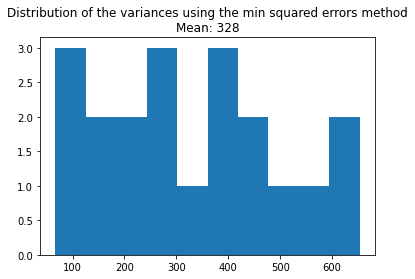

In [11]:
trials = 20
variances_sq = []
variances_abs = []

for _ in range(trials):
    diff = 0
    diff_abs = 0
    y_hat = 0
    y_hat_abs = 0 
    
    #Create a random split
    
    train, test = train_test_split(df, test_size=0.2)    
    initial_guess = np.ones(27)

    # Use squared errors
    initial_guess = np.ones(27)
    results_sq_errors = minimize(get_sq_errors, args = train, method = "BFGS", x0 = initial_guess)
    fitted_params = results_sq_errors.x
    #get the values of the betas
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= fitted_params
    # get the value of the prediction for G3
    y_hat = beta0 + test["school"]*beta1  + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26
    # Get the difference and it's squared and get the variance of this for this split
    diff = test['G3'] - y_hat
    variances_sq.append(stats.variance(diff**2))

    # Use absolute value of the error
    results_abs = minimize(get_sq_errors_abs, args = train, method = "BFGS", x0 = initial_guess)
    fitted_params = results_abs.x
    #get the values of the betas
    beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8,  beta9, beta10, beta11, beta12, beta13, beta14, beta15, beta16, beta17, beta18, beta19, beta20, beta21, beta22, beta23, beta24, beta25, beta26= fitted_params
    # get the value of the prediction for G3
    y_hat_abs= beta0 + test["school"]*beta1  + test["sex"]*beta2 + test["age"]*beta3 + test["address"]*beta4 + test["famsize"]*beta5 + test["Pstatus"]*beta6 + test["Medu"]*beta7 + test["Fedu"]*beta8 + test["traveltime"]*beta9 + test["studytime"]*beta10 +test["failures"]*beta11 + test["schoolsup"]*beta12 + test["famsup"]*beta13 + test["paid"]*beta14 + test["activities"]*beta15 + test["nursery"]*beta16 + test["higher"]*beta17 + test['internet']*beta18 +test["romantic"]*beta19 + test['famrel']*beta20 + test['freetime']*beta21 + test["goout"]*beta22 + test["Dalc"]*beta23 + test["Walc"]*beta24 + test["health"]*beta25 +test["absences"]*beta26
    # Get the difference and it's squared and get the variance of this for this split
    diff_abs = test['G3'] - y_hat_abs

    variances_abs.append(stats.variance(diff_abs**2))


plt.hist(variances_sq)
plt.title(f"Distribution of the variances using the min squared errors method\nMean: {round(np.mean(variances_sq))}")

Text(0.5, 1.0, 'Distribution of the variances using the min absolute difference method\nMean: 357')

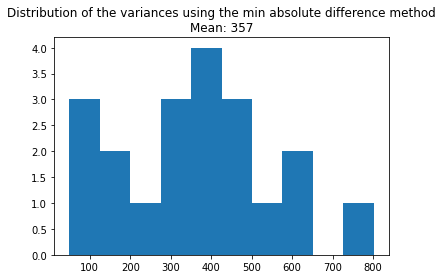

In [12]:
plt.hist(variances_abs)
plt.title(f"Distribution of the variances using the min absolute difference method\nMean: {round(np.mean(variances_abs))}")

This shows that the variance is slightly lower using the squared error method, which maybe part of the reason why we use it instead of absolute errors.